In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
# loading the USPS data
coa_usps_2020 = pd.read_csv("/Users/shreyad/Library/CloudStorage/OneDrive-HarvardUniversity/DS Final Project/1. Data/1. Change of Address Stats/Y2020.csv")
coa_usps_2021 = pd.read_csv("/Users/shreyad/Library/CloudStorage/OneDrive-HarvardUniversity/DS Final Project/1. Data/1. Change of Address Stats/Y2021.csv")

In [10]:
# load the ZIP to County crosswalk
# pip install openpyxl

zip_county_crosswalk = pd.read_csv("/Users/shreyad/Library/CloudStorage/OneDrive-HarvardUniversity/DS Final Project/1. Data/6. Crosswalks/zip_county_122022.csv")


In [11]:
# cleaning the ZIP Code variable in 2020 dataset
coa_usps_2020['ZIPCODE'] = coa_usps_2020['ZIPCODE'].str.replace('="', '', regex=False)
coa_usps_2020['ZIPCODE'] = coa_usps_2020['ZIPCODE'].str.replace('"', '', regex=False)

# cleaning the ZIP Code variable in 2021 dataset
coa_usps_2021['ZIPCODE'] = coa_usps_2021['ZIPCODE'].str.replace('="', '', regex=False)
coa_usps_2021['ZIPCODE'] = coa_usps_2021['ZIPCODE'].str.replace('"', '', regex=False)


In [12]:
# limit dataset to New York State
ny_data_2020 = coa_usps_2020[coa_usps_2020['STATE'] == 'NY']
ny_data_2021 = coa_usps_2021[coa_usps_2021['STATE'] == 'NY']

In [13]:
# NY 2020 dataset review
ny_data_2020.head()

,YYYYMM,ZIPCODE,CITY,STATE,TOTAL FROM ZIP,TOTAL BUSINESS,TOTAL FAMILY,TOTAL INDIVIDUAL,TOTAL PERM,TOTAL TEMP,TOTAL TO ZIP,TOTAL BUSINESS.1,TOTAL FAMILY.1,TOTAL INDIVIDUAL.1,TOTAL PERM.1,TOTAL TEMP.1
2150,202001,10001,NEW YORK,NY,476,143,29,304,442,34,474,167,48,259,444,30
2151,202001,10002,NEW YORK,NY,399,24,49,326,371,28,356,0,47,299,330,26
2152,202001,10003,NEW YORK,NY,495,70,61,364,443,52,362,27,39,296,324,38
2153,202001,10004,NEW YORK,NY,59,22,0,30,53,0,59,21,13,25,51,0
2154,202001,10005,NEW YORK,NY,176,26,26,124,159,17,139,24,23,92,125,14


In [14]:
# NY 2020 dataset review
print(ny_data_2020.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16312 entries, 2150 to 269137
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   YYYYMM              16312 non-null  int64 
 1   ZIPCODE             16312 non-null  object
 2   CITY                16312 non-null  object
 3   STATE               16312 non-null  object
 4   TOTAL FROM ZIP      16312 non-null  int64 
 5   TOTAL BUSINESS      16312 non-null  int64 
 6   TOTAL FAMILY        16312 non-null  int64 
 7   TOTAL INDIVIDUAL    16312 non-null  int64 
 8   TOTAL PERM          16312 non-null  int64 
 9   TOTAL TEMP          16312 non-null  int64 
 10  TOTAL TO ZIP        16312 non-null  int64 
 11  TOTAL BUSINESS.1    16312 non-null  int64 
 12  TOTAL FAMILY.1      16312 non-null  int64 
 13  TOTAL INDIVIDUAL.1  16312 non-null  int64 
 14  TOTAL PERM.1        16312 non-null  int64 
 15  TOTAL TEMP.1        16312 non-null  int64 
dtypes: int64(13), object(3)

In [15]:
# NY 2021 dataset review
ny_data_2021.head()

,YYYYMM,ZIPCODE,CITY,STATE,TOTAL FROM ZIP,TOTAL BUSINESS,TOTAL FAMILY,TOTAL INDIVIDUAL,TOTAL PERM,TOTAL TEMP,TOTAL TO ZIP,TOTAL BUSINESS.1,TOTAL FAMILY.1,TOTAL INDIVIDUAL.1,TOTAL PERM.1,TOTAL TEMP.1
2156,202101,10001,NEW YORK,NY,784,295,63,426,623,161,572,167,33,372,522,50
2157,202101,10002,NEW YORK,NY,741,43,75,623,622,119,538,23,65,450,498,40
2158,202101,10003,NEW YORK,NY,969,124,108,737,720,249,612,119,50,443,548,64
2159,202101,10004,NEW YORK,NY,184,84,18,82,124,60,82,27,0,45,74,0
2160,202101,10005,NEW YORK,NY,358,135,27,196,312,46,219,41,18,160,202,17


In [16]:
# NY 2021 dataset review
print(ny_data_2021.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15863 entries, 2156 to 265231
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   YYYYMM              15863 non-null  int64 
 1   ZIPCODE             15863 non-null  object
 2   CITY                15863 non-null  object
 3   STATE               15863 non-null  object
 4   TOTAL FROM ZIP      15863 non-null  int64 
 5   TOTAL BUSINESS      15863 non-null  int64 
 6   TOTAL FAMILY        15863 non-null  int64 
 7   TOTAL INDIVIDUAL    15863 non-null  int64 
 8   TOTAL PERM          15863 non-null  int64 
 9   TOTAL TEMP          15863 non-null  int64 
 10  TOTAL TO ZIP        15863 non-null  int64 
 11  TOTAL BUSINESS.1    15863 non-null  int64 
 12  TOTAL FAMILY.1      15863 non-null  int64 
 13  TOTAL INDIVIDUAL.1  15863 non-null  int64 
 14  TOTAL PERM.1        15863 non-null  int64 
 15  TOTAL TEMP.1        15863 non-null  int64 
dtypes: int64(13), object(3)

In [17]:
# keep only relevant variables
keep_columns = ['YYYYMM', 'ZIPCODE', 'CITY', 'STATE', 'TOTAL FROM ZIP', 'TOTAL TO ZIP'] 
ny_data_2020_analysis = ny_data_2020[keep_columns]
ny_data_2021_analysis = ny_data_2021[keep_columns]

In [18]:
# create a new variable that is net migration = Total to zip - total from zip

# For ny_data_2020_analysis DataFrame
ny_data_2020_analysis.loc[:, 'net_migration_2020'] = ny_data_2020_analysis['TOTAL FROM ZIP'] - ny_data_2020_analysis['TOTAL TO ZIP']
ny_data_2020_analysis.loc[:, 'Year'] = '2020'

/var/folders/m4/qn76dqkn77gb8t_lb7cry0fw0000gn/T/ipykernel_14026/1181122910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data_2020_analysis.loc[:, 'net_migration_2020'] = ny_data_2020_analysis['TOTAL FROM ZIP'] - ny_data_2020_analysis['TOTAL TO ZIP']
/var/folders/m4/qn76dqkn77gb8t_lb7cry0fw0000gn/T/ipykernel_14026/1181122910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data_2020_analysis.loc[:, 'Year'] = '2020'


In [19]:
# For ny_data_2021_analysis DataFrame
ny_data_2021_analysis.loc[:, 'net_migration_2021'] = ny_data_2021_analysis['TOTAL FROM ZIP'] - ny_data_2021_analysis['TOTAL TO ZIP']
ny_data_2021_analysis.loc[:, 'Year'] = '2021'

/var/folders/m4/qn76dqkn77gb8t_lb7cry0fw0000gn/T/ipykernel_14026/3506617296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data_2021_analysis.loc[:, 'net_migration_2021'] = ny_data_2021_analysis['TOTAL FROM ZIP'] - ny_data_2021_analysis['TOTAL TO ZIP']
/var/folders/m4/qn76dqkn77gb8t_lb7cry0fw0000gn/T/ipykernel_14026/3506617296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data_2021_analysis.loc[:, 'Year'] = '2021'


In [20]:
# append the two datasets 
ny_data_combined = pd.concat([ny_data_2020_analysis, ny_data_2021_analysis], ignore_index=True)

# cleaning column names in the final dataset
ny_data_combined = ny_data_combined.rename(columns={'TOTAL FROM ZIP': 'total_from_zip'})
ny_data_combined = ny_data_combined.rename(columns={'TOTAL TO ZIP': 'total_to_zip'})
ny_data_combined.columns = [col.lower() for col in ny_data_combined.columns]


In [21]:
# view the final dataset
ny_data_combined.head()

,yyyymm,zipcode,city,state,total_from_zip,total_to_zip,net_migration_2020,year,net_migration_2021
0,202001,10001,NEW YORK,NY,476,474,2.0,2020,NaN
1,202001,10002,NEW YORK,NY,399,356,43.0,2020,NaN
2,202001,10003,NEW YORK,NY,495,362,133.0,2020,NaN
3,202001,10004,NEW YORK,NY,59,59,0.0,2020,NaN
4,202001,10005,NEW YORK,NY,176,139,37.0,2020,NaN


In [22]:
zip_county_crosswalk.head()
zip_county_crosswalk = zip_county_crosswalk.rename(columns={'ZIP': 'zipcode'})
zip_county_crosswalk.columns = [col.lower() for col in zip_county_crosswalk.columns]
zip_county_crosswalk['zipcode'] = zip_county_crosswalk['zipcode'].astype(str)

# select specific variables to keep for the merge
zip_county_crosswalk_merge = zip_county_crosswalk[['zipcode', 'county']]


In [23]:
ny_data_combined_county = pd.merge(ny_data_combined, zip_county_crosswalk_merge, on='zipcode', how='inner')


In [24]:
ny_data_combined_county.head()

,yyyymm,zipcode,city,state,total_from_zip,total_to_zip,net_migration_2020,year,net_migration_2021,county
0,202001,10001,NEW YORK,NY,476,474,2.0,2020,NaN,36061
1,202002,10001,NEW YORK,NY,407,485,-78.0,2020,NaN,36061
2,202003,10001,NEW YORK,NY,1547,449,1098.0,2020,NaN,36061
3,202004,10001,NEW YORK,NY,990,288,702.0,2020,NaN,36061
4,202005,10001,NEW YORK,NY,982,338,644.0,2020,NaN,36061


In [25]:
ny_county_level_data = ny_data_combined_county.groupby('county').agg({
    'net_migration_2020': 'sum',
    'net_migration_2021': 'sum',
}).reset_index()
ny_county_level_data.head()

,county,net_migration_2020,net_migration_2021
0,36001,2687.0,4659.0
1,36003,1036.0,789.0
2,36005,25346.0,20808.0
3,36007,1915.0,2413.0
4,36009,784.0,736.0


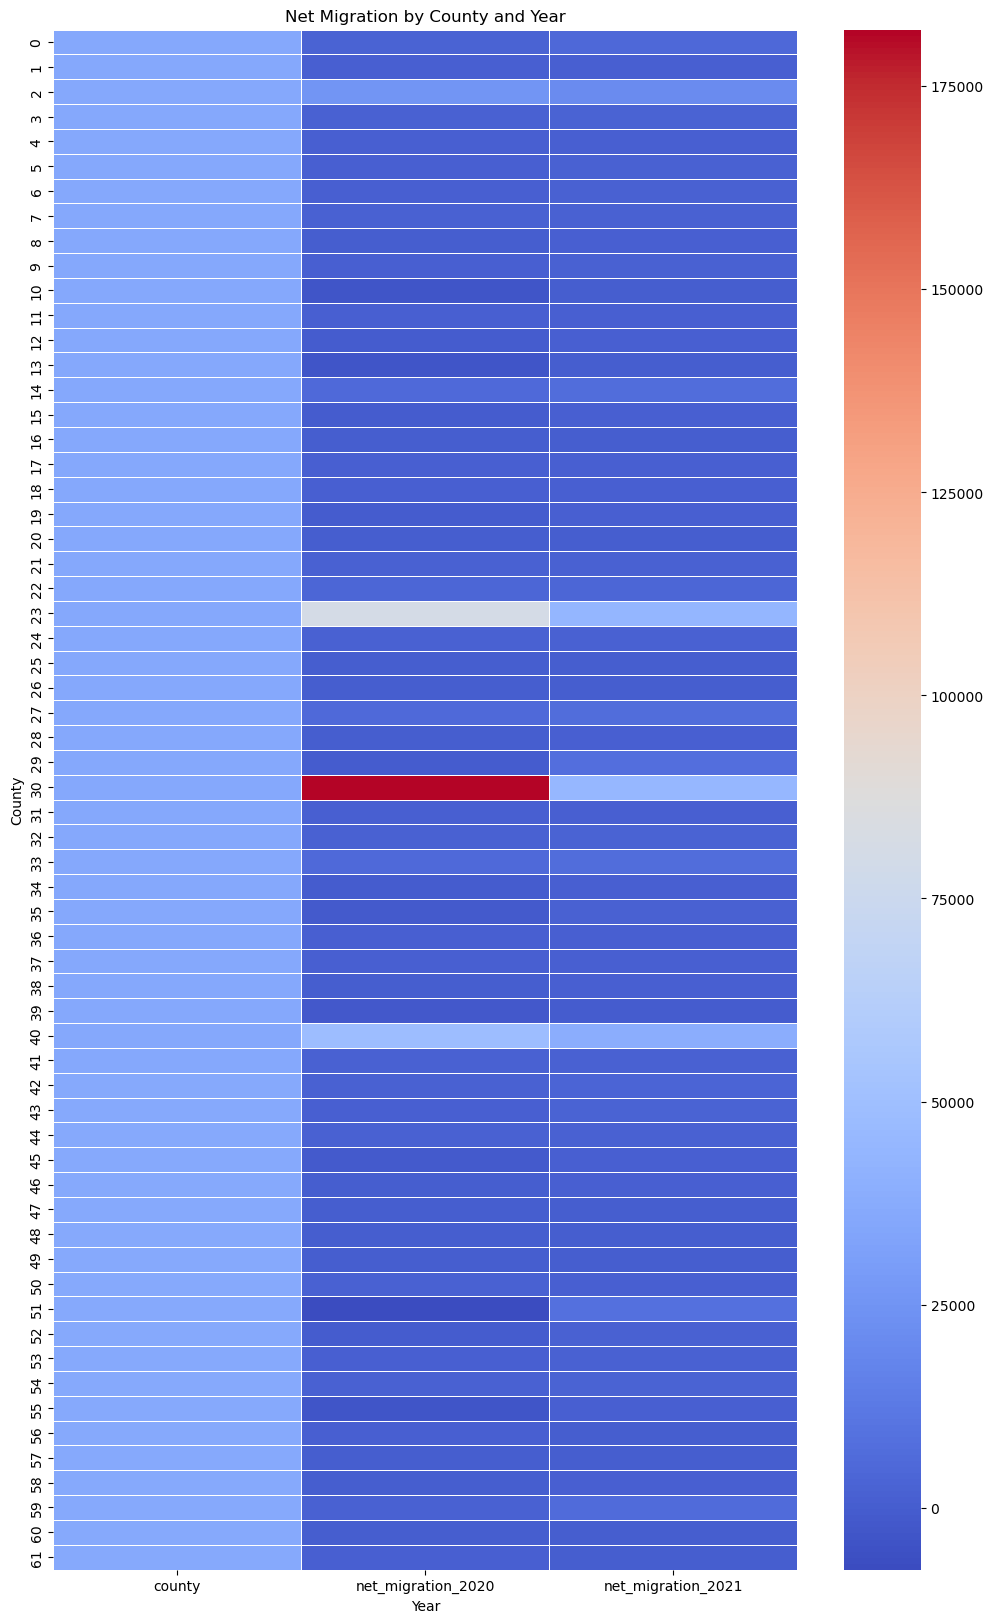

In [26]:
# Create the heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(ny_county_level_data, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Net Migration by County and Year')
plt.xlabel('Year')
plt.ylabel('County')
plt.show()

In [28]:
top_10_counties_2020 = ny_county_level_data.sort_values(by='net_migration_2020', ascending=False).head(10)
top_10_counties_2020.head(10)

,county,net_migration_2020,net_migration_2021
30,36061,181954.0,44768.0
23,36047,80576.0,43608.0
40,36081,48440.0,38938.0
2,36005,25346.0,20808.0
27,36055,5300.0,6944.0
14,36029,5206.0,7106.0
33,36067,5006.0,6740.0
22,36045,3741.0,3813.0
0,36001,2687.0,4659.0
54,36109,2016.0,2604.0


/Users/shreyad/Y/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shreyad/Y/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shreyad/Y/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shreyad/Y/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

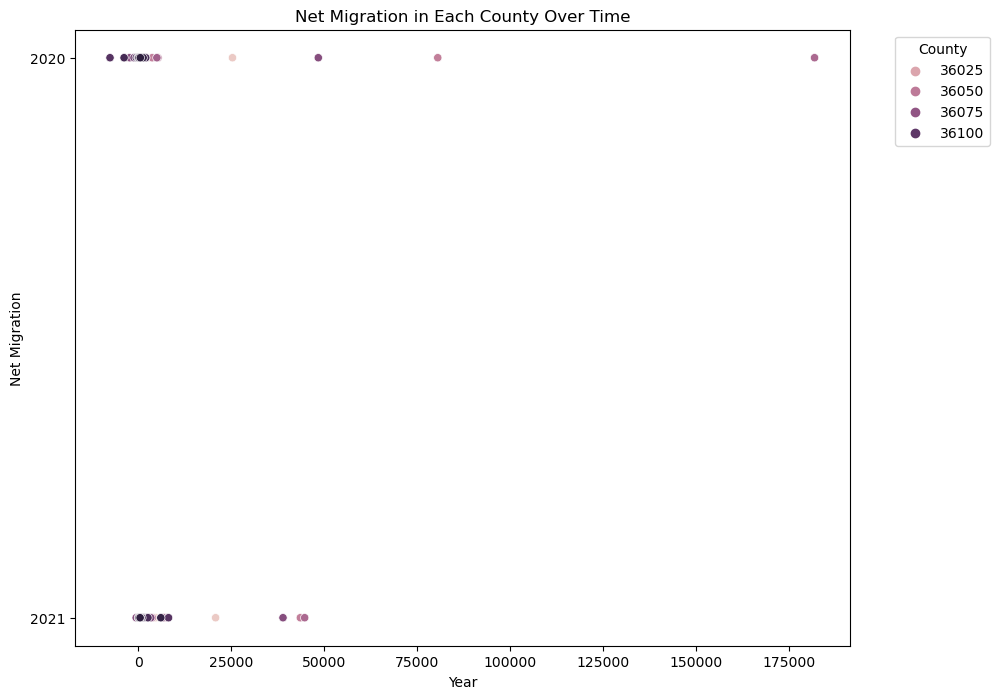

In [32]:
# Reshape the data
ny_county_long = ny_county_level_data.melt(id_vars='county', 
                                           value_vars=['net_migration_2020', 'net_migration_2021'], 
                                           var_name='year', 
                                           value_name='net_migration')

# Convert 'year' to a more friendly format, e.g., just the year number
ny_county_long['year'] = ny_county_long['year'].str[-4:]

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=ny_county_long, x='net_migration', y='year', hue='county')

plt.title('Net Migration in Each County Over Time')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()